In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
ann_model = models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

C:\Users\ADMIN\.conda\envs\myenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9266 - loss: 0.2569 - val_accuracy: 0.9585 - val_loss: 0.1388
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9664 - loss: 0.1145 - val_accuracy: 0.9701 - val_loss: 0.0975
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9762 - loss: 0.0784 - val_accuracy: 0.9748 - val_loss: 0.0773
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9817 - loss: 0.0599 - val_accuracy: 0.9749 - val_loss: 0.0765
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9859 - loss: 0.0469 - val_accuracy: 0.9751 - val_loss: 0.0820


In [6]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

C:\Users\ADMIN\.conda\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9585 - loss: 0.1362 - val_accuracy: 0.9813 - val_loss: 0.0573
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9860 - loss: 0.0462 - val_accuracy: 0.9884 - val_loss: 0.0341
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9898 - loss: 0.0328 - val_accuracy: 0.9877 - val_loss: 0.0358
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9890 - val_loss: 0.0331
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9903 - val_loss: 0.0292


In [7]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print("CNN Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9903 - loss: 0.0292
CNN Test Accuracy: 0.9902999997138977


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


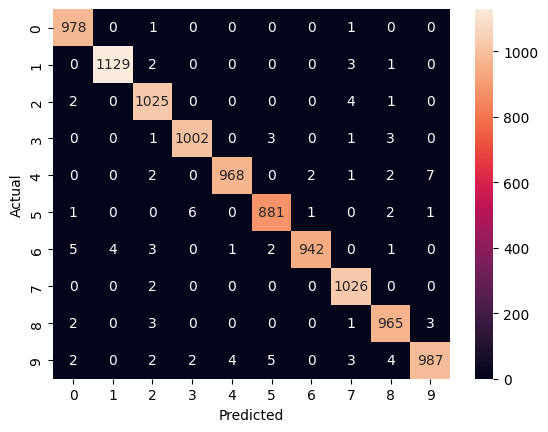

In [8]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
cnn_model.save("mnist_model.h5")